In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading data and taking a first peek

In [2]:
data = pd.read_csv("../data/raw/2021-10-19_14-11-08_val_candidate_data.csv")

In [3]:
data.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
0,298,Female,No,0,Graduate,No,5000.0,2541,151.0,480.0,1.0,Rural,0,No,N
1,115,Male,Yes,1,Graduate,No,14583.0,0,185.0,180.0,1.0,Rural,1,No,Y
2,312,Female,No,0,Graduate,No,2507.0,0,56.0,360.0,1.0,Rural,0,No,Y
3,605,Male,Yes,0,Not Graduate,No,2400.0,3800,NaN,180.0,1.0,Urban,0,No,N
4,465,Male,No,0,Graduate,No,6000.0,0,140.0,360.0,1.0,Rural,0,No,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  580 non-null    int64  
 1   feature_0   571 non-null    object 
 2   feature_1   577 non-null    object 
 3   feature_2   566 non-null    object 
 4   feature_3   562 non-null    object 
 5   feature_4   547 non-null    object 
 6   feature_5   563 non-null    float64
 7   feature_6   580 non-null    object 
 8   feature_7   559 non-null    float64
 9   feature_8   567 non-null    float64
 10  feature_9   533 non-null    float64
 11  feature_10  580 non-null    object 
 12  feature_11  566 non-null    object 
 13  feature_12  547 non-null    object 
 14  target      580 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 68.1+ KB


### Summary
- 580 total observations, with 13 features
- mix of numerical and categorical feature types
- most feature columns have some rows with missing values

## A Deeper Look at The Data

In [82]:
laundry_list = [] # data cleaning items we maintain as we look at the data

### Categorical Fields

In [5]:
cats = [
    "feature_0",
    "feature_1",
    "feature_2",
    "feature_3",
    "feature_4",
    "feature_6",
    "feature_10",
    "feature_11",
    "feature_12",
]

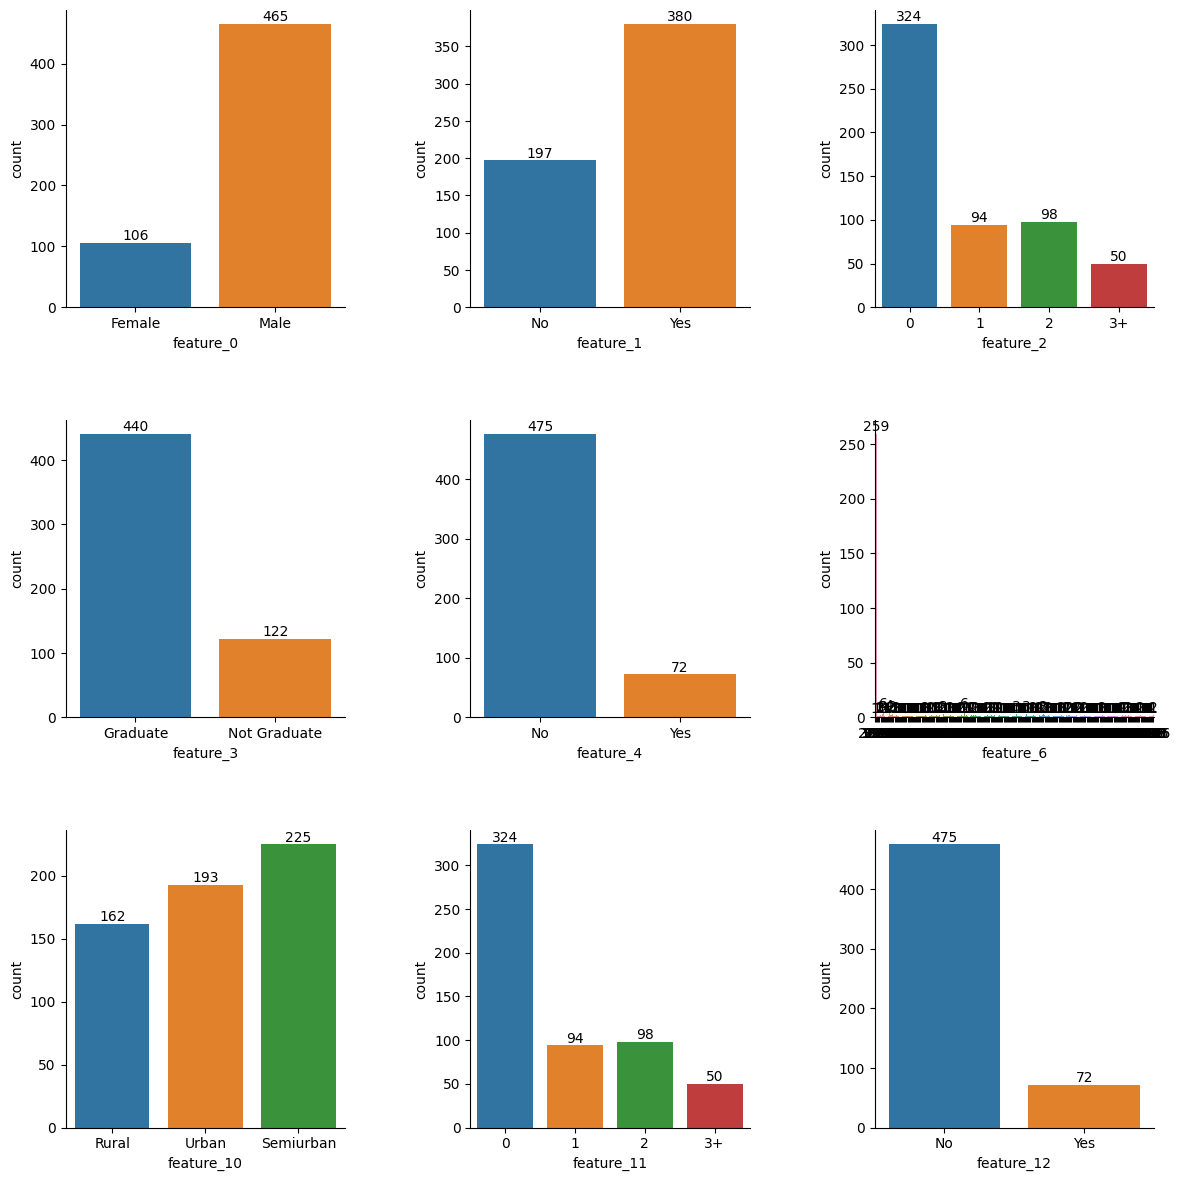

In [75]:
fig, axes = plt.subplots(3, 3, figsize = (13,13))
for ix, f in enumerate(cats):
    ax = axes.flatten()[ix]
    sns.countplot(data, x=f, orient='v', ax=ax)
    ax.bar_label(ax.containers[0])
    sns.despine()
fig.tight_layout(pad=5.0)

#### Observations
- `feature_2` and `feature_11` have identical counts
- `feature_4` and `feature_12` have identical counds
- Something wonky is up with `feature_6`

In [76]:
# only place these are not equal is when they are nan... ie. they're equivalent!
data[(data['feature_2'] != data['feature_11'])]

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
93,104,Male,NaN,NaN,Graduate,No,3816.0,754,160.0,360.0,1.0,Urban,NaN,No,Y
183,293,Female,No,NaN,Graduate,No,5417.0,0,143.0,480.0,0.0,Urban,NaN,No,N
203,226,Male,Yes,NaN,Not Graduate,Yes,4735.0,0,138.0,360.0,1.0,Urban,NaN,Yes,N
251,597,Male,No,NaN,NaN,No,2987.0,0,88.0,360.0,0.0,Semiurban,NaN,No,N
258,332,Male,No,NaN,NaN,No,2833.0,0,71.0,360.0,1.0,Urban,NaN,No,Y
282,571,Male,Yes,NaN,Graduate,No,5116.0,1451,165.0,360.0,0.0,Urban,NaN,No,N
294,517,Male,Yes,NaN,Not Graduate,No,3074.0,1800,123.0,360.0,0.0,Semiurban,NaN,No,N
296,355,Female,No,NaN,NaN,No,3813.0,0,116.0,180.0,1.0,Urban,NaN,No,Y
368,228,Male,NaN,NaN,Graduate,No,4758.0,0,158.0,480.0,1.0,Semiurban,NaN,No,Y
383,102,Male,Yes,NaN,Graduate,No,13650.0,0,NaN,360.0,1.0,Urban,NaN,No,Y


In [77]:
# only place these are not equal is when they are nan... ie. they're equivalent!
data[(data['feature_4'] != data['feature_12'])]

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
21,107,Male,No,0,Not Graduate,NaN,7333.0,0,120.0,360.0,1.0,Rural,0,NaN,N
22,170,Male,Yes,0,Not Graduate,NaN,1820.0,1769,95.0,360.0,1.0,Rural,0,NaN,Y
26,463,Female,No,1,Not Graduate,NaN,5191.0,0,132.0,360.0,1.0,Semiurban,1,NaN,Y
31,468,Female,Yes,2,Not Graduate,NaN,210.0,2917,98.0,360.0,1.0,Semiurban,2,NaN,Y
36,268,Female,No,0,Graduate,NaN,3418.0,0,135.0,360.0,1.0,Rural,0,NaN,N
60,333,Male,Yes,0,Graduate,NaN,63337.0,0,490.0,180.0,1.0,Urban,0,NaN,Y
62,535,Male,No,0,Not Graduate,NaN,2550.0,2042,126.0,360.0,1.0,Rural,0,NaN,Y
87,11,Male,Yes,2,Graduate,NaN,2500.0,1840,109.0,360.0,1.0,Urban,2,NaN,Y
116,218,Male,Yes,2,Graduate,NaN,5000.0,0,72.0,360.0,0.0,Semiurban,2,NaN,N
120,95,Male,No,0,Graduate,NaN,6782.0,0,NaN,360.0,NaN,Urban,0,NaN,N


#### What's up with `feature_ 6`?

In [78]:
data[data['feature_6'].apply(lambda x: '.' in x)]

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target
182,282,Male,Yes,2,Graduate,No,2301.0,9.857.999.878,78.0,180.0,1.0,Urban,2,No,Y
303,428,Male,Yes,0,Graduate,No,NaN,1.612.000.084,87.0,360.0,1.0,Rural,0,No,Y


In [79]:
 # based on this these can all be cast into int type
data['feature_6'][~data['feature_6'].apply(lambda x: '.' in x)]

0      2541
1         0
2         0
3      3800
4         0
       ... 
575    2336
576    1668
577    1041
578    1803
579     484
Name: feature_6, Length: 578, dtype: object

- it was read in as `object` type by pandas
- it appears its due to 2 records that have multiple "." in their entries
    - "9.857.999.878" and "1.612.000.084"

Couple options to go from here:
Since, I can't really make what this field is meant to represent, and I have no conviction as to how to fix these observations reliably, I can either:
1. omit these two records from the dataset;
2. treat them as missing and deal with them as I plan to deal with the other missing values in this column (which may be equivalent to action 1. above)

In [80]:
cats.remove("feature_6")

In [110]:
cats.remove("feature_11")
cats.remove("feature_12")

### Summary
- `feature_6` was loaded in as an `object` type, but upon investigation it appears there were two inconsistent entries that lead to casting
    - all other entries for this column appear to be of int type for which there were 259 distinct values
    - while possible, unlikely this column is a categorical one with this many levels
    - going to treat this as a numeric type instead
- action taken was to omit these two observations from consideration in training the model
- with respect to the other features, the number of levels is less than or equal to 4, so we can nicely handle these with OHE if needed
- drop `feature_11` since it is the same as `feature_2`
- drop `feature_12` since it is the same as `feature_4`

In [89]:
data = data.loc[~data['feature_6'].apply(lambda x: '.' in x)].reset_index(drop=True)
data['feature_6'] = data['feature_6'].astype(int)

In [84]:
laundry_list += [
    "remove the two records that have erroneous entries for feature_6",
    "drop feature 11 since same as feature_2",
    "drop feature 12 since same as feature_4"
]

### Numerical Features

In [87]:
conts = [
    "feature_5",
    "feature_6",
    "feature_7",
    "feature_8",
    "feature_9"
]

In [90]:
data[conts].describe()

,feature_5,feature_6,feature_7,feature_8,feature_9
count,562.000000,578.000000,557.000000,565.000000,531.000000
mean,5534.281139,1623.179931,145.763016,343.178761,0.841808
std,6512.091445,2987.660904,84.651579,64.050110,0.365265
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2890.250000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1125.500000,125.000000,360.000000,1.000000
75%,5939.500000,2269.500000,166.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


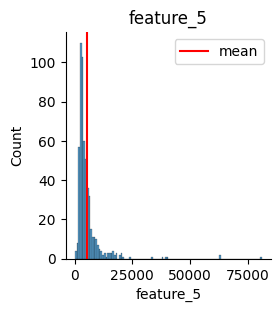

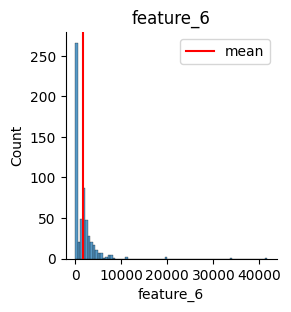

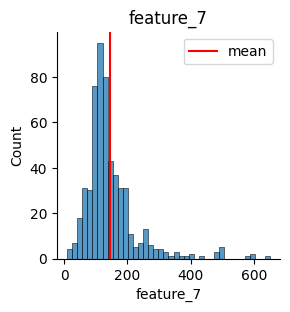

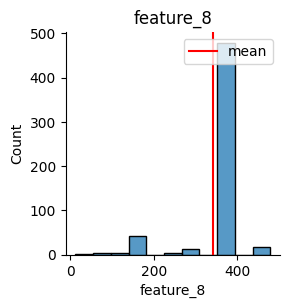

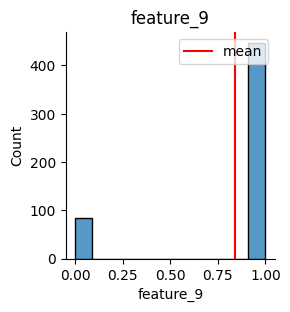

In [92]:
for f in conts:
    ax = sns.displot(data[f], kde=False, height=3)
    plt.axvline(x=np.mean(data[f]), color='red', label='mean')
    plt.legend(loc='upper right')
    plt.title(f"{f}")

#### Observations
- `feature_5`, `feature_6` and `feature_7` look to have typical numerical distributions
- `feature_8` and `feature_9` distributions look suspicious 

#### What's up with `feature_8` and `feature_9`?

In [94]:
pd.crosstab(index=data['feature_8'], columns='freq')

col_0,freq
feature_8,
12.0,1
36.0,1
60.0,2
84.0,2
120.0,3
180.0,43
240.0,4
300.0,13
360.0,479


In [96]:
pd.crosstab(index=data['feature_9'], columns='freq')

col_0,freq
feature_9,
0.0,84
1.0,447


- `feature_8` only takes on values that are multiples of 12, but importantly there are only 10 different levels. Though I would suspect this feature is an ordinal one.
- `feature_9` looks like it only takes on binary values

### Summary
- `feature_8` and `feature_9` have distributions that seem to better suit a categorical type of feature

In [98]:
laundry_list += [
    "cast feature_8 as a categorical feature",
    "cast feature_9 as a categorical feature"
]

In [99]:
cats.append('feature_8')
cats.append('feature_9')
conts.remove('feature_8')
conts.remove('feature_9')

### Rows with Missing Values
- There are still a bunch of rows with some missing values
    - 150 rows to be precise (~25% of the dataset)

In [21]:
df.isna().any(axis=1).sum()

150

#### Summary
- Will need to do either:
    1. A Complete Case Analysis (removing all of the rows with missing values)
    2. Apply some sensible imputation methods, for example
        - `categorical`: add `missing` category
        - `numerical`: use `median`
- Scratch that... let's do both analyses
    - complete would be fine if we don't expect to predict on observations with missing values
    - otherwise, we need a way to handle missing values at prediction time

In [100]:
laundry_list += [
    "prepare a .csv file with only complete observations for complete-case analysis",
    "prepare a .csv data file with both incomplete and complete observations for an imputed analysis"
]

### Target Variable

In [101]:
target = 'target'

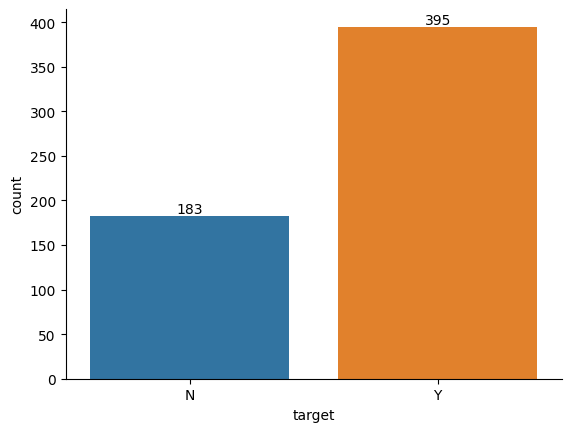

In [102]:
ax = sns.countplot(data, x='target', orient='v')
ax.bar_label(ax.containers[0])
sns.despine()

### Summary
- Slight imbalance with target variable ~31% 
- Probably best to not rely on `accuracy` of ML model, but instead something like `Brier's score`, `f1_score`, `precision`, `recall` depending on the objective function of the downstream measurement 

In [103]:
laundry_list += [
    "target has some imbalance with class N occurring only 31% of the time in the data"
]

### Relations to Target

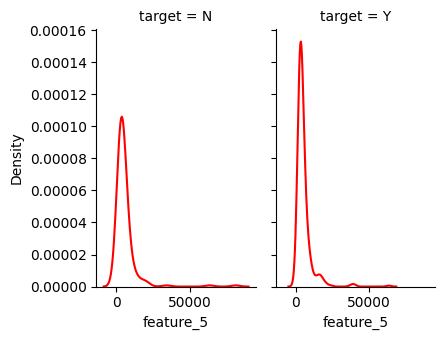

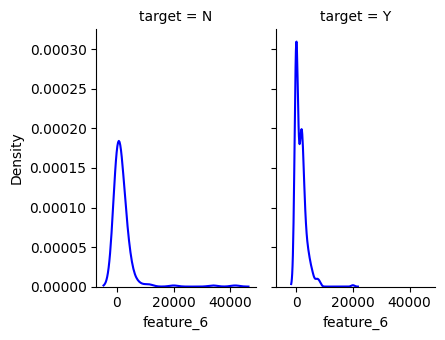

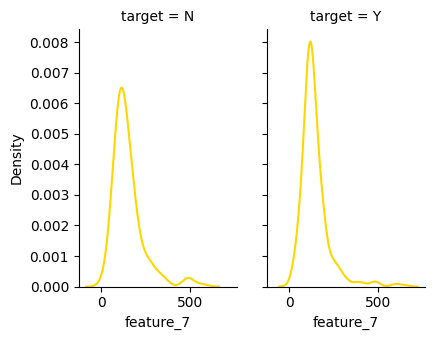

In [105]:
# Conditional KDE of features given value of target
color = ['red', 'blue', 'gold']
for f,c in zip(conts,color):
    g = sns.FacetGrid(data, col=target, height=3.5, aspect=.65)
    g.map_dataframe(sns.kdeplot, x=f, color=c)

#### Observations
- There seems to be some differences in the conditional distributions in all numeric features
    - We'll see if this has some affect in building the ML models

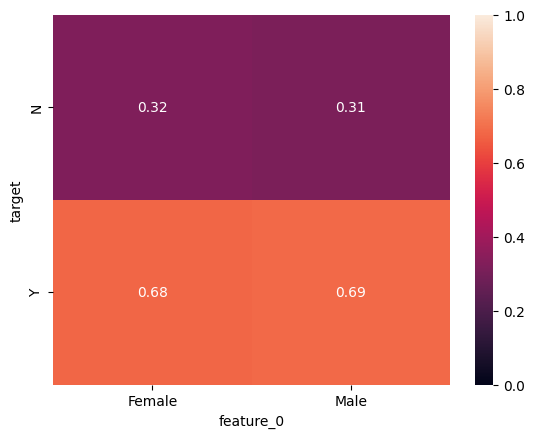

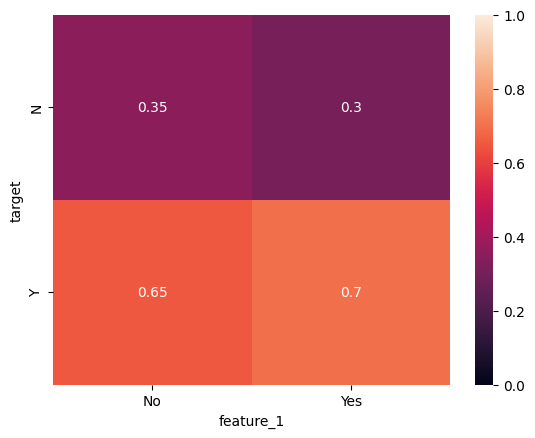

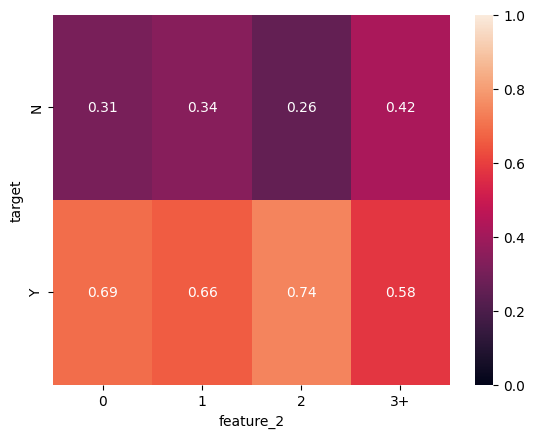

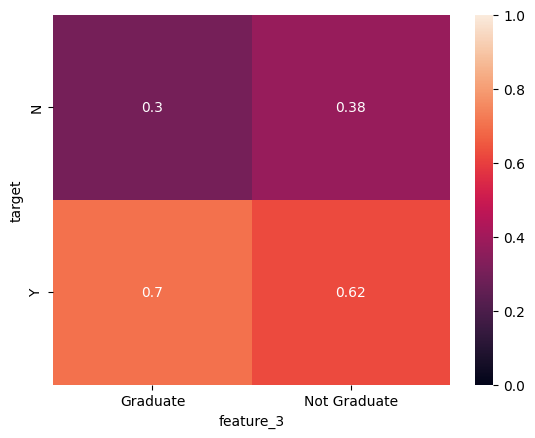

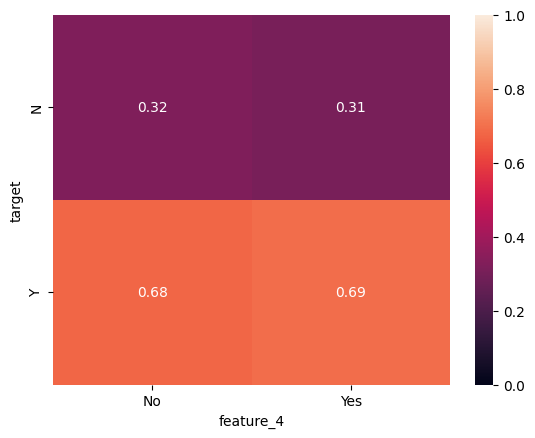

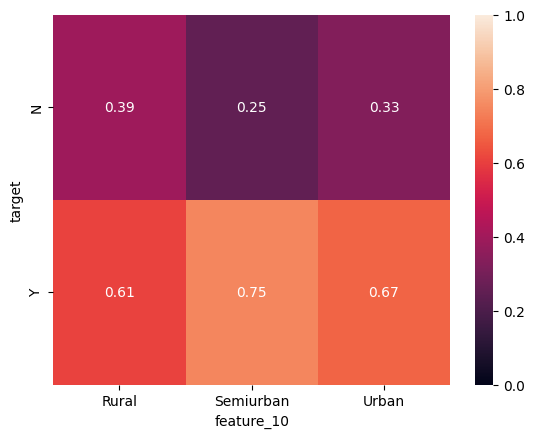

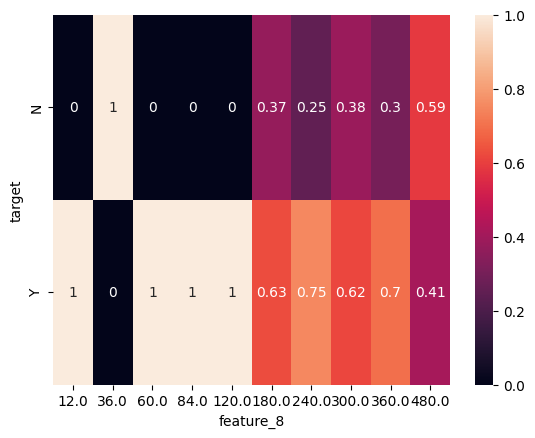

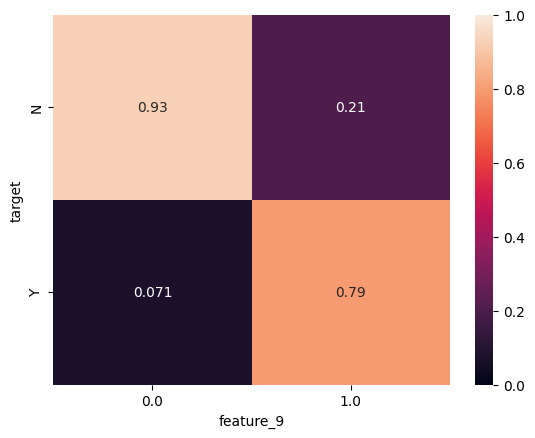

In [111]:
# contingency heat maps
for f in cats:
    contingency_table = pd.crosstab(index=data[target], columns=data[f]).apply(lambda r: r/r.sum(), axis=0)
    sns.heatmap(contingency_table, annot=True, vmin=0, vmax=1)
    plt.show()

#### Observations
- Some marginal, conditional distributions don't look to have any affect on target. I.e., it would seem that the target is independent of some features conditional on their levels. For example `feature_4`.
    - For feature selection, we're going to try and let the ML algo decide this automatically through some kind of regularization.

## Final Summary

Main Takeaways:
1. There are some data cleaning steps that need to be performed
2. We will conduct two separate analyses: Complete case and Imputed case
3. 

In [117]:
print("To-do items with data cleaning/processing:\n")
for ix, item in enumerate(laundry_list):
    print(f"{ix + 1}. {item}")

To-do items with data cleaning/processing:

1. remove the two records that have erroneous entries for feature_6
2. drop feature 11 since same as feature_2
3. drop feature 12 since same as feature_4
4. cast feature_8 as a categorical feature
5. case feature_9 as a categorical feature
6. prepare a .csv file with only complete observations for complete-case analysis
7. prepare a .csv data file with both incomplete and complete observations for an imputed analysis
8. target has some imbalance with class N occurring only 31% of the time in the data
